In [38]:
# Q10 - Chapter 9 Unsupervised learning
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt

There are ten different images of each of 40 distinct subjects. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement).

In [2]:
olivetti = fetch_olivetti_faces()

In [3]:
olivetti.keys()

dict_keys([&#39;data&#39;, &#39;images&#39;, &#39;target&#39;, &#39;DESCR&#39;])

In [4]:
X = olivetti.data
y = olivetti.target

In [5]:
X.shape

(400, 4096)

In [29]:
# split data into train/validation/test using train_test_split
from sklearn.model_selection import train_test_split
X_1, X_test, y_1, y_test = train_test_split(X,y , test_size = 40)
#type(y_test)

# counts the number of each item
#unique, counts = np.unique(y_test, return_counts=True)
#dict(zip(unique, counts))

In [34]:
#X_train, X_valid = X_1[:280], X_1[280:]

Want train/validation and test set. " Since the data is quite small, we use stratified sampling to ensure that there are the same number of images per person in each set"

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit
strat_split = StratifiedShuffleSplit(n_splits=1, test_size =40, random_state=42) #n_spliits = 1???

# This first loop seperates the data set into two - X train AND valid + X_test 
# So really only gives X_test. X_train_valid will be used in the next loop to further separate train and valid
for train_valid_idx, test_idx in strat_split.split(X, y):
    X_train_valid, X_test = X[train_valid_idx], X[test_idx]
    y_train_valid, y_test = y[train_valid_idx], y[test_idx]

# further splits X_train_valid into train + valid
strat_split = StratifiedShuffleSplit(n_splits=1, test_size =80, random_state=42)
for train_idx, valid_idx in strat_split.split(X_train_valid, y_train_valid):
    X_train, X_valid = X_train_valid[train_idx], X_train_valid[valid_idx]
    y_train, y_valid = y_train_valid[train_idx], y_train_valid[valid_idx]

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


To speed things up, we'll reduce the data's dimensionality using PCA:

In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

200

Next, cluster the images using K-Means, and ensure that you have a good number of clusters (using one of the techniques discussed in this chapter). 

In [28]:
# Calculate silhouette scores

In [45]:
from sklearn.cluster import KMeans
k_range = range(5, 150, 5)
kmeans_per_k = []

# This loop undertakes the KMeans algorithm for k value in multiples of 5, creates the model, then puts them into a list kmeans_per_k
for k in k_range:
    #print("k={}".format(k))
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

In [46]:
kmeans_per_k

[KMeans(n_clusters=5, random_state=42),
 KMeans(n_clusters=10, random_state=42),
 KMeans(n_clusters=15, random_state=42),
 KMeans(n_clusters=20, random_state=42),
 KMeans(n_clusters=25, random_state=42),
 KMeans(n_clusters=30, random_state=42),
 KMeans(n_clusters=35, random_state=42),
 KMeans(n_clusters=40, random_state=42),
 KMeans(n_clusters=45, random_state=42),
 KMeans(n_clusters=50, random_state=42),
 KMeans(n_clusters=55, random_state=42),
 KMeans(n_clusters=60, random_state=42),
 KMeans(n_clusters=65, random_state=42),
 KMeans(n_clusters=70, random_state=42),
 KMeans(n_clusters=75, random_state=42),
 KMeans(n_clusters=80, random_state=42),
 KMeans(n_clusters=85, random_state=42),
 KMeans(n_clusters=90, random_state=42),
 KMeans(n_clusters=95, random_state=42),
 KMeans(n_clusters=100, random_state=42),
 KMeans(n_clusters=105, random_state=42),
 KMeans(n_clusters=110, random_state=42),
 KMeans(n_clusters=115, random_state=42),
 KMeans(n_clusters=120, random_state=42),
 KMeans(n_cl

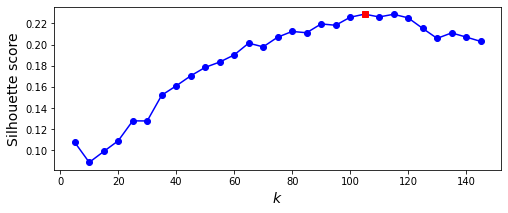

In [56]:
from sklearn.metrics import silhouette_score

# Calculates silhouette scores for very KMeans model above
silhouette_scores = [silhouette_score(X_train_pca, model.labels_) for model in kmeans_per_k]

best_index = np.argmax(silhouette_scores) # assignment of largest silhouette score value
best_k = k_range[best_index] # assignment of best k value given the best index value
best_score = silhouette_scores[best_index] # assignment of best score

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs") # makes the best point red
plt.show()

In [57]:
# Best number of clusters is:
best_k

105

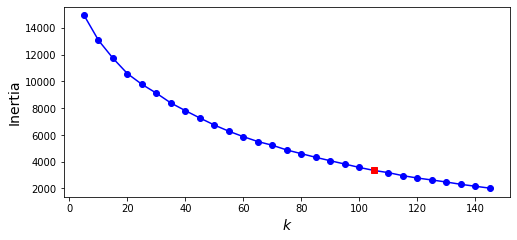

In [58]:
# Plot an inertia diagram and look for the 'elbow'

inertias = [model.inertia_ for model in kmeans_per_k]

best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")
plt.show()




Since there is no obvious elbow, we accept n = 105 here as the best number of clusters

In [60]:
# define best model

best_model = kmeans_per_k[best_index] 

Cluster 0


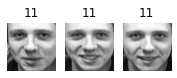

Cluster 1


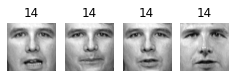

Cluster 2


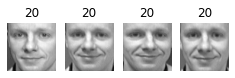

Cluster 3


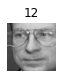

Cluster 4


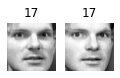

Cluster 5


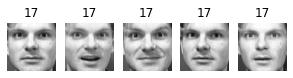

Cluster 6


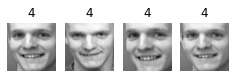

Cluster 7


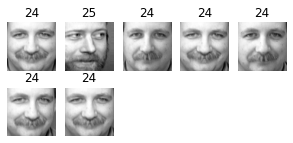

Cluster 8


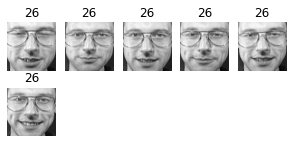

Cluster 9


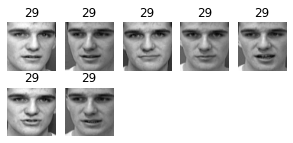

Cluster 10


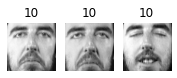

Cluster 11


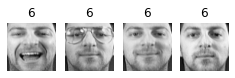

Cluster 12


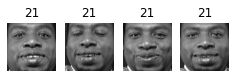

Cluster 13


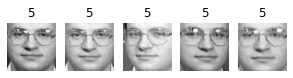

Cluster 14


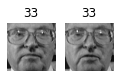

Cluster 15


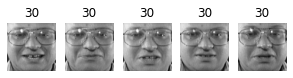

Cluster 16


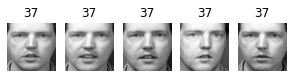

Cluster 17


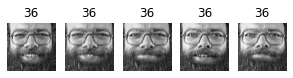

Cluster 18


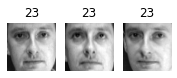

Cluster 19


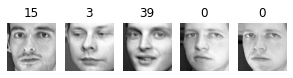

Cluster 20


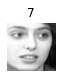

Cluster 21


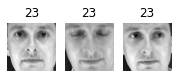

Cluster 22


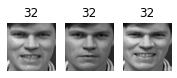

Cluster 23


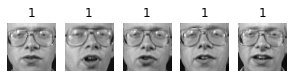

Cluster 24


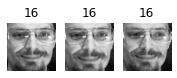

Cluster 25


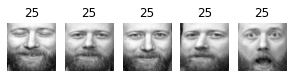

Cluster 26


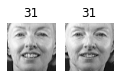

Cluster 27


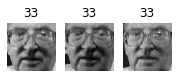

Cluster 28


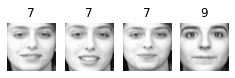

Cluster 29


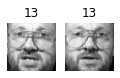

Cluster 30


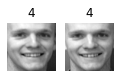

Cluster 31


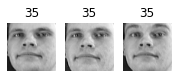

Cluster 32


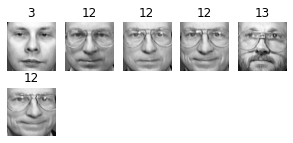

Cluster 33


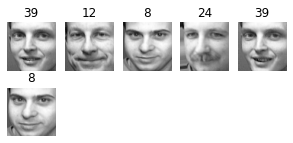

Cluster 34


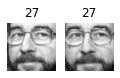

Cluster 35


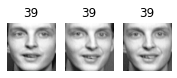

Cluster 36


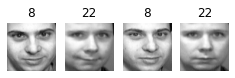

Cluster 37


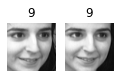

Cluster 38


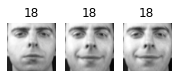

Cluster 39


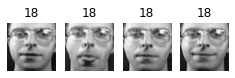

Cluster 40


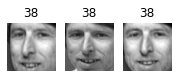

Cluster 41


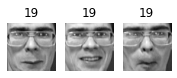

Cluster 42


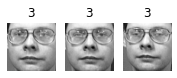

Cluster 43


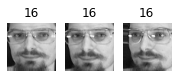

Cluster 44


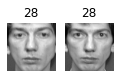

Cluster 45


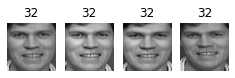

Cluster 46


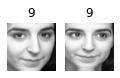

Cluster 47


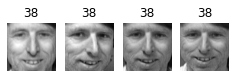

Cluster 48


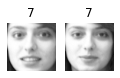

Cluster 49


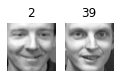

Cluster 50


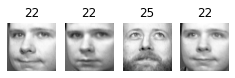

Cluster 51


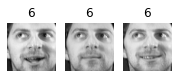

Cluster 52


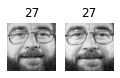

Cluster 53


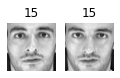

Cluster 54


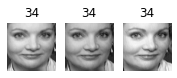

Cluster 55


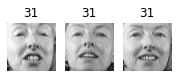

Cluster 56


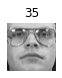

Cluster 57


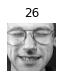

Cluster 58


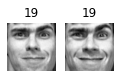

Cluster 59


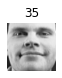

Cluster 60


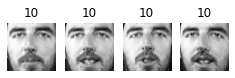

Cluster 61


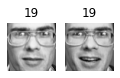

Cluster 62


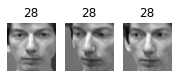

Cluster 63


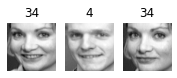

Cluster 64


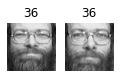

Cluster 65


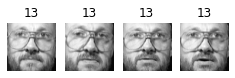

Cluster 66


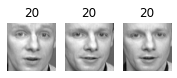

Cluster 67


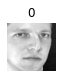

Cluster 68


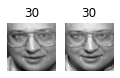

Cluster 69


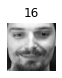

Cluster 70


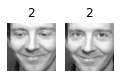

Cluster 71


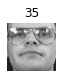

Cluster 72


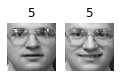

Cluster 73


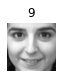

Cluster 74


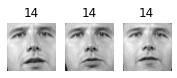

Cluster 75


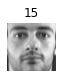

Cluster 76


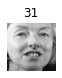

Cluster 77


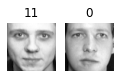

Cluster 78


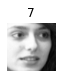

Cluster 79


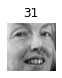

Cluster 80


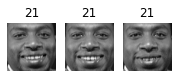

Cluster 81


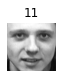

Cluster 82


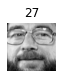

Cluster 83


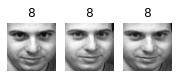

Cluster 84


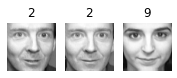

Cluster 85


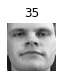

Cluster 86


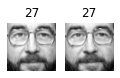

Cluster 87


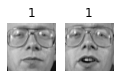

Cluster 88


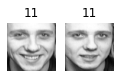

Cluster 89


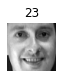

Cluster 90


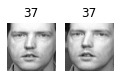

Cluster 91


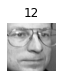

Cluster 92


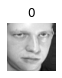

Cluster 93


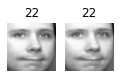

Cluster 94


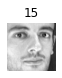

Cluster 95


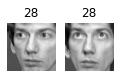

Cluster 96


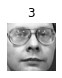

Cluster 97


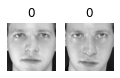

Cluster 98


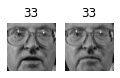

Cluster 99


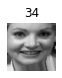

Cluster 100


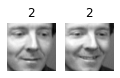

Cluster 101


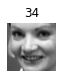

Cluster 102


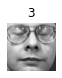

Cluster 103


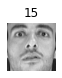

Cluster 104


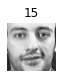

In [61]:
#Visualise Clusters

def plot_faces(faces, labels, n_cols=5):
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face.reshape(64, 64), cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster].reshape(-1, 64, 64)
    labels = y_train[in_cluster]
    plot_faces(faces, labels)